<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-10169-1691067442/blob/main/IBM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [687]:
import warnings
warnings.filterwarnings('ignore')

# Required Packages

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [689]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## Loading the dataset

In [690]:
df=pd.read_csv("/content/collegePlace.csv")

In [691]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [692]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [693]:
df.shape

(2966, 8)

The info() method prints information about the DataFrame.


In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [695]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [696]:
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
Hostel               False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [697]:
df.duplicated().value_counts()

True     1829
False    1137
dtype: int64

In [698]:
df=df.drop_duplicates()

In [699]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,21.641161,0.851363,6.988566,0.335092,0.296394,0.579595
std,1.715606,0.831743,1.067630,0.472230,0.456868,0.493841
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,1.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [700]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [701]:
df['PlacedOrNot'].value_counts()

1    659
0    478
Name: PlacedOrNot, dtype: int64

In [702]:
df['Age'].value_counts()

21    302
22    282
20    172
23    123
19    106
24     83
26     42
25     22
28      3
30      1
29      1
Name: Age, dtype: int64

In [703]:
df['Stream'].value_counts()

Computer Science                 243
Information Technology           243
Electronics And Communication    174
Mechanical                       165
Electrical                       160
Civil                            152
Name: Stream, dtype: int64

In [704]:
print(df.corr())

                        Age  Internships      CGPA    Hostel  \
Age                1.000000    -0.060236 -0.106051 -0.012259   
Internships       -0.060236     1.000000  0.051616  0.014860   
CGPA              -0.106051     0.051616  1.000000  0.012844   
Hostel            -0.012259     0.014860  0.012844  1.000000   
HistoryOfBacklogs -0.084312    -0.048438  0.030415  0.090065   
PlacedOrNot        0.052444     0.164916  0.533497 -0.048414   

                   HistoryOfBacklogs  PlacedOrNot  
Age                        -0.084312     0.052444  
Internships                -0.048438     0.164916  
CGPA                        0.030415     0.533497  
Hostel                      0.090065    -0.048414  
HistoryOfBacklogs           1.000000    -0.055885  
PlacedOrNot                -0.055885     1.000000  


[]

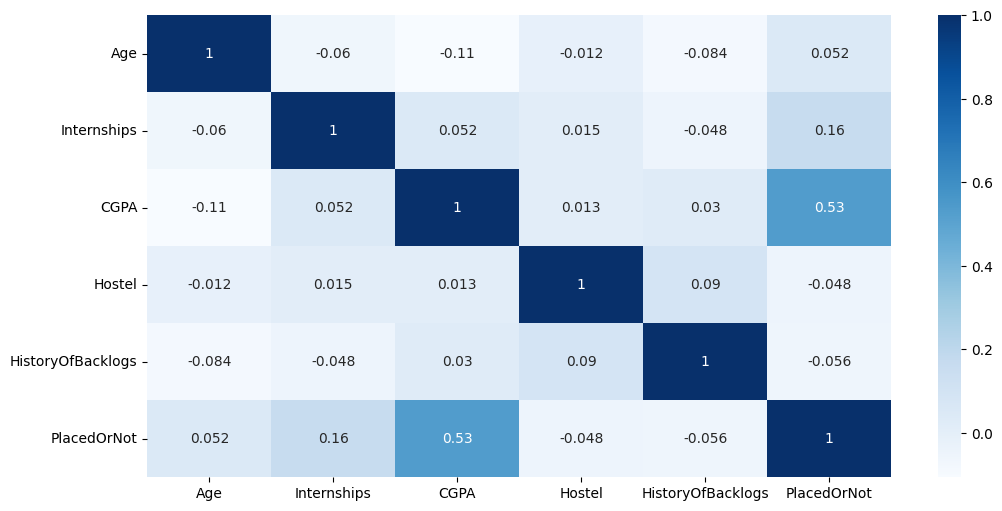

In [705]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.plot()

In [706]:
#df['Stream']=df['Stream'].replace({'Computer Science':0,'Information Technology':1,'Electronics And Communication':2,'Mechanical':3,'Electrical':4,'Civil':5})

In [707]:
df['Gender']=df['Gender'].replace({'Male':1,"Female":2})

In [708]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,2,Computer Science,0,7,1,1,1
2,22,2,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


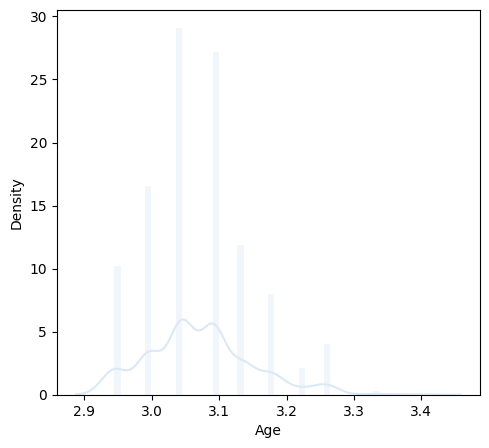

In [709]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df['Age']))


<Axes: ylabel='Density'>

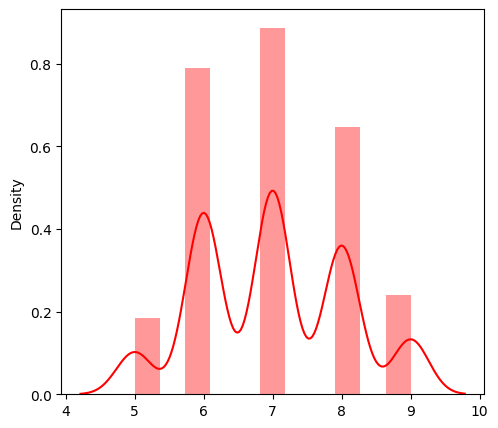

In [710]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df[['CGPA']],color='r')


<Axes: ylabel='Density'>

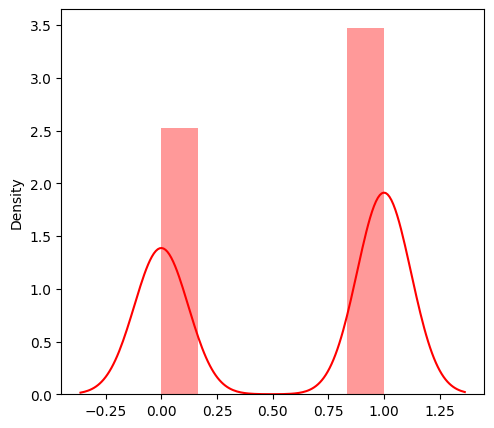

In [711]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df[['PlacedOrNot']],color='r')


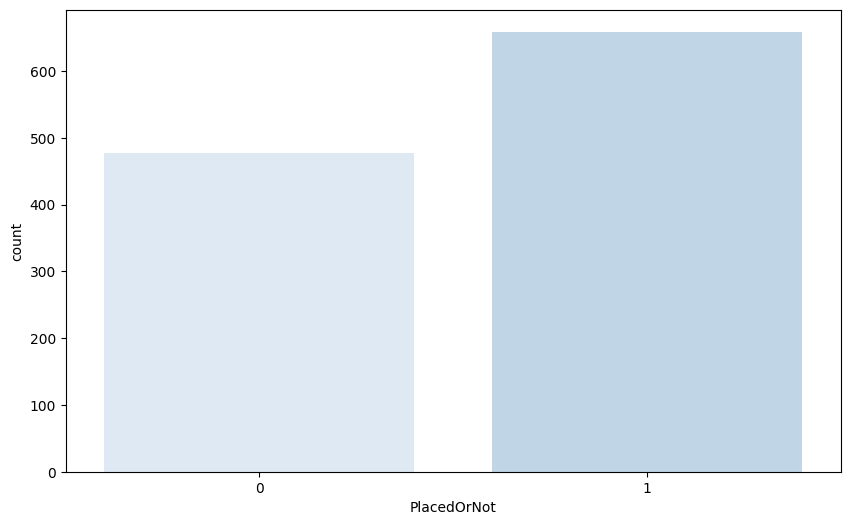

In [712]:
plt.figure(figsize = (10, 6), dpi = 100)

color_palette = sns.color_palette("Blues")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()

In [713]:
#"label encoding"
from sklearn.preprocessing import LabelEncoder

In [714]:
le=LabelEncoder()# based alphabets order it give numbering
df['StreamLabelEncoder']=le.fit_transform(df['Stream'])
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,StreamLabelEncoder
0,22,1,Electronics And Communication,1,8,1,1,1,3
1,21,2,Computer Science,0,7,1,1,1,1
2,22,2,Information Technology,1,6,0,0,1,4
3,21,1,Information Technology,0,8,0,1,1,4
4,22,1,Mechanical,0,8,1,0,1,5
...,...,...,...,...,...,...,...,...,...
2946,23,1,Information Technology,1,7,1,1,0,4
2952,23,1,Mechanical,0,8,1,0,1,5
2954,23,2,Computer Science,1,8,0,1,1,1
2958,23,1,Computer Science,0,6,0,1,0,1


In [715]:
df=df.drop(['Hostel'],axis=1)

In [716]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,StreamLabelEncoder
0,22,1,Electronics And Communication,1,8,1,1,3
1,21,2,Computer Science,0,7,1,1,1
2,22,2,Information Technology,1,6,0,1,4
3,21,1,Information Technology,0,8,1,1,4
4,22,1,Mechanical,0,8,0,1,5
...,...,...,...,...,...,...,...,...
2946,23,1,Information Technology,1,7,1,0,4
2952,23,1,Mechanical,0,8,0,1,5
2954,23,2,Computer Science,1,8,1,1,1
2958,23,1,Computer Science,0,6,1,0,1


In [717]:
df=df.drop(['Stream'],axis=1)
df

,Age,Gender,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,StreamLabelEncoder
0,22,1,1,8,1,1,3
1,21,2,0,7,1,1,1
2,22,2,1,6,0,1,4
3,21,1,0,8,1,1,4
4,22,1,0,8,0,1,5
...,...,...,...,...,...,...,...
2946,23,1,1,7,1,0,4
2952,23,1,0,8,0,1,5
2954,23,2,1,8,1,1,1
2958,23,1,0,6,1,0,1


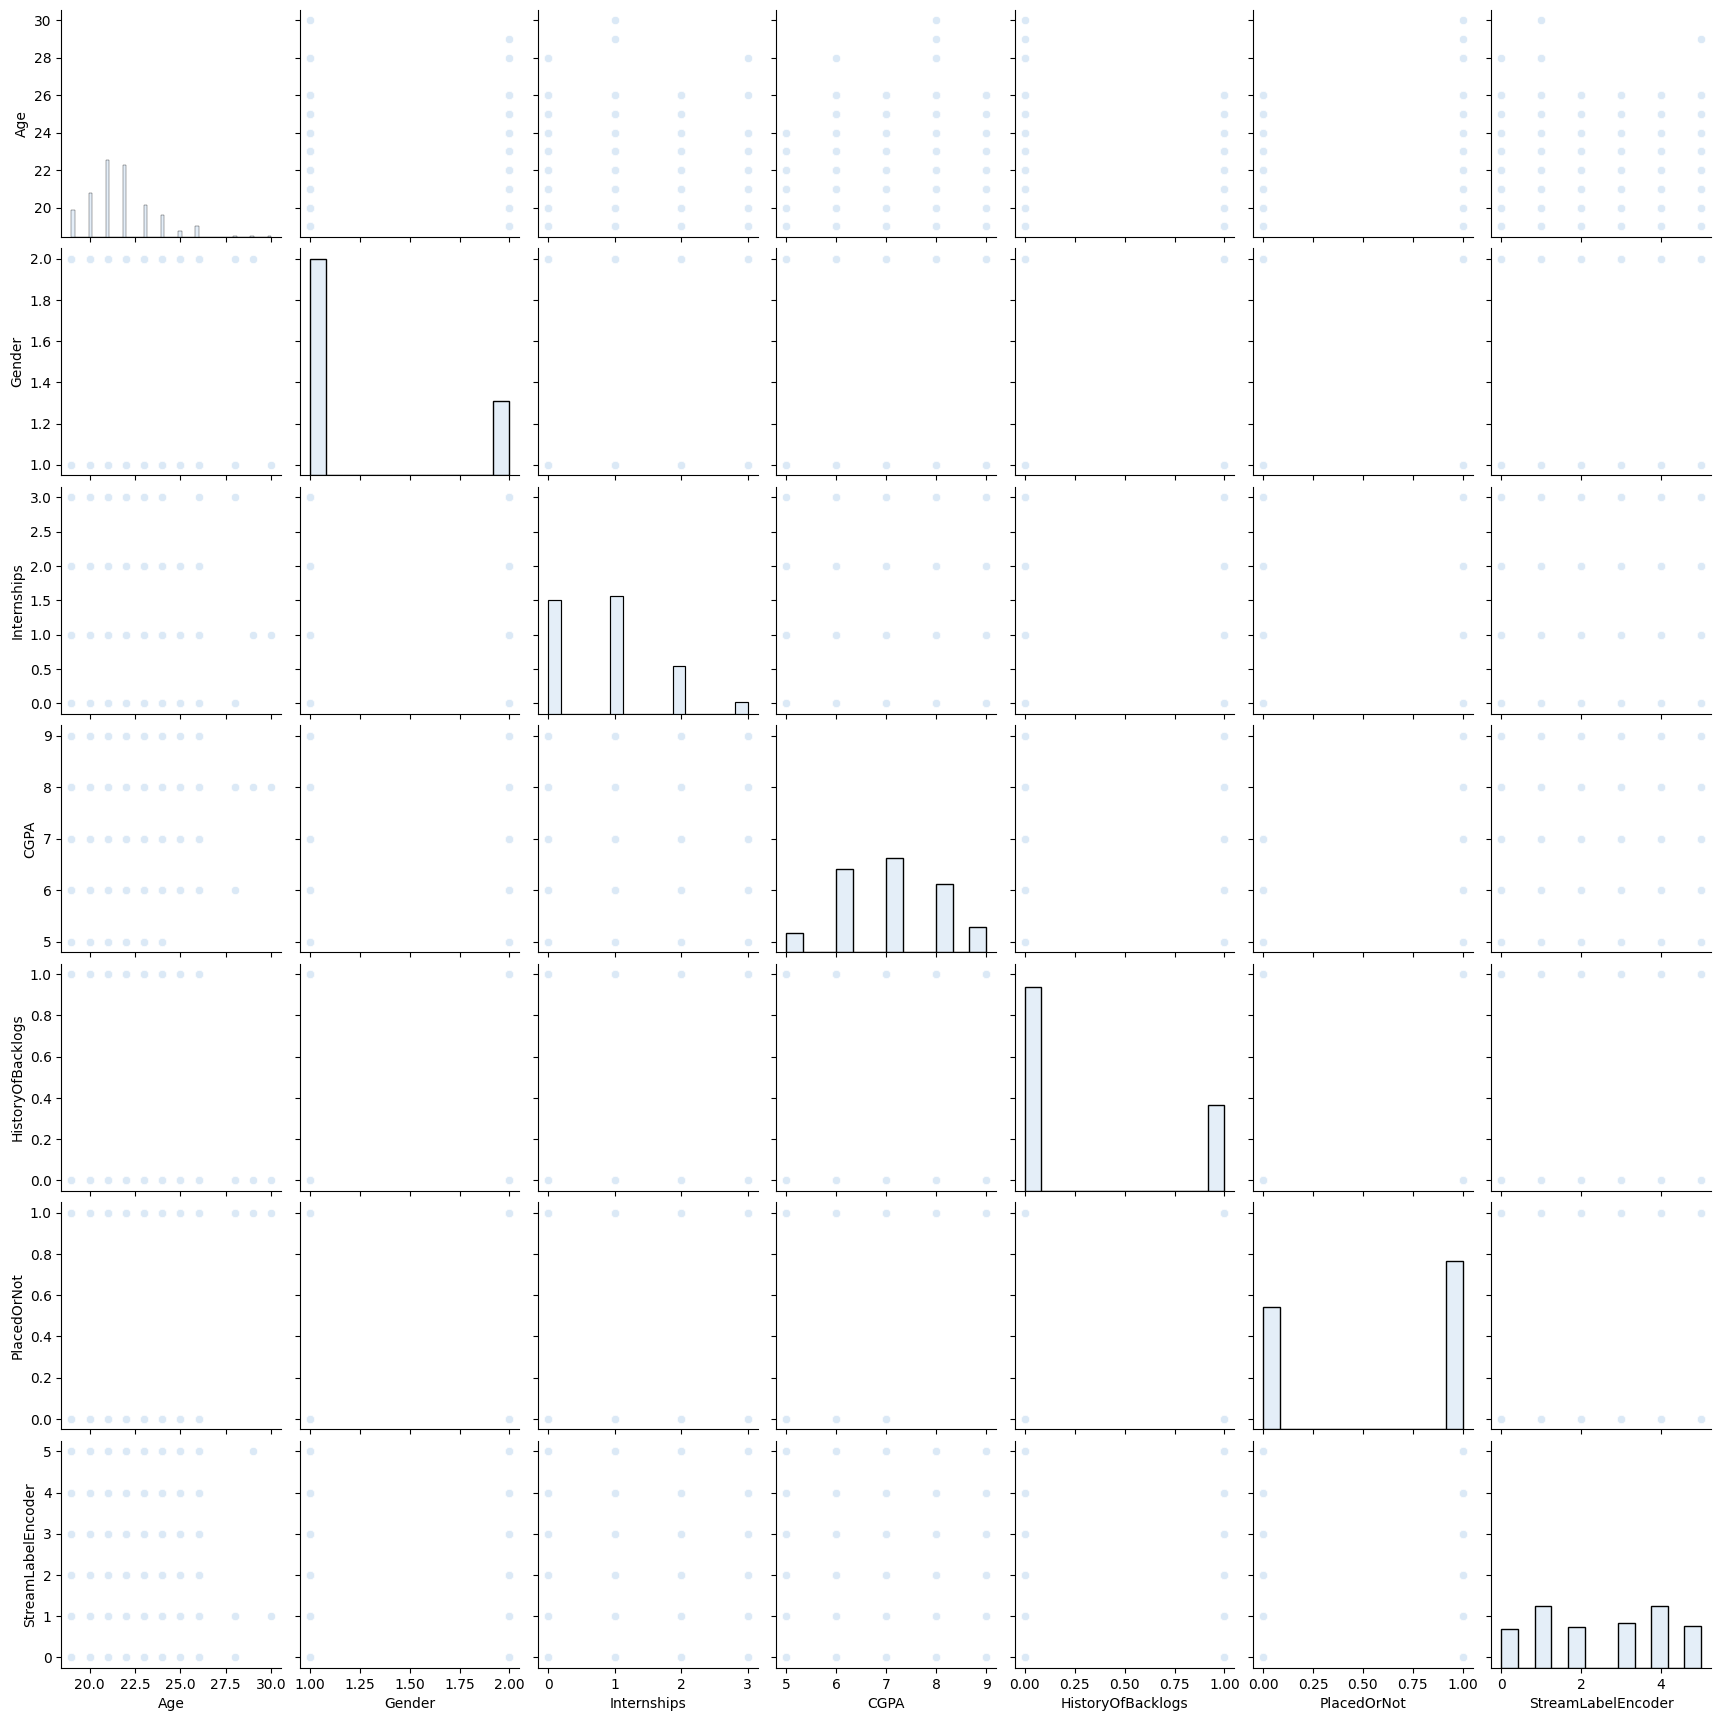

In [718]:
sns.pairplot(df)

In [719]:
import plotly.express as px
fig=px.pie(df,values='PlacedOrNot',names='Age')
fig.show()

In [720]:
X=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20,random_state=2)

In [721]:
X

,Age,Gender,Internships,CGPA,HistoryOfBacklogs,StreamLabelEncoder
0,22,1,1,8,1,3
1,21,2,0,7,1,1
2,22,2,1,6,0,4
3,21,1,0,8,1,4
4,22,1,0,8,0,5
...,...,...,...,...,...,...
2946,23,1,1,7,1,4
2952,23,1,0,8,0,5
2954,23,2,1,8,1,1
2958,23,1,0,6,1,1


In [722]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2946    0
2952    1
2954    1
2958    0
2960    0
Name: PlacedOrNot, Length: 1137, dtype: int64

SVM

In [723]:
print('xtrain :',Xtrain.shape)
print('xtest:', Xtest.shape)
print('\n ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain : (909, 6)
xtest: (228, 6)

 ytrain: (909,)
ytest: (228,)


In [724]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')

In [725]:
svm.fit(Xtrain,ytrain)

SVC(kernel='linear')

In [726]:
pred_test=svm.predict(Xtest)
pred_train=svm.predict(Xtrain)

In [727]:
train_accuracy=accuracy_score(pred_train,ytrain)
Accmodel1=accuracy_score(pred_test,ytest)*100

In [728]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(ytest,pred_test)
cm1

array([[59, 41],
       [29, 99]])

In [729]:
print("accuracy of SVM on training data is",train_accuracy*100)
print("accuracy of SVM on testing data is",Accmodel1)

accuracy of SVM on training data is 74.58745874587459
accuracy of SVM on testing data is 69.2982456140351


KNN

In [730]:
best_k=0
best_score=0
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(Xtrain,ytrain)
    knn_temp_predict=knn_temp.predict(Xtest)
    score=accuracy_score(ytest,knn_temp_predict)*100
    if score>best_score and score<100:
        best_score=score
        Accmodel2=best_score
        best_k=k
print("k=",best_k)
print("accuracy of KNN=",Accmodel2)

k= 27
accuracy of KNN= 78.94736842105263


In [731]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(ytest,knn_temp_predict)
cm2

array([[ 74,  26],
       [ 28, 100]])

ANN

In [732]:

!pip3 install tensorflow

In [733]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers


In [734]:
classifier=Sequential()
classifier.add(Dense(6,activation='relu',input_dim=6))
classifier.add(Dropout(0.50))
classifier.add(Dense(6,activation='relu'))
classifier.add(Dropout(0.50))
classifier.add(Dense(1,activation='sigmoid'))

In [735]:
loss1=BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss1,metrics=['accuracy'])

In [736]:
classifier.fit(Xtrain,ytrain,batch_size=20,epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 1.0254 - accuracy: 0.5281
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9261 - accuracy: 0.5347
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7991 - accuracy: 0.5127
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.5358
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7015 - accuracy: 0.5523
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.5336
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.5776
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5391
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5523
Epoch 10/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5600
Epoch 11/

Decision Tree Classifier

In [737]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(Xtrain ,ytrain)
y_pred = dt.predict(Xtest)


In [738]:
cm3 = confusion_matrix(ytest,y_pred)
cm3

array([[78, 22],
       [29, 99]])

In [739]:
Accmodel3=metrics.accuracy_score(ytest , y_pred)*100
print("Accuracy of DT", Accmodel3)

Accuracy of DT 77.63157894736842


In [740]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(Xtrain , ytrain)
y_pred = rt.predict(Xtest)


In [741]:
cm4 = confusion_matrix(ytest,y_pred)
cm4

array([[67, 33],
       [32, 96]])

In [742]:
Accmodel4=metrics.accuracy_score(ytest , y_pred)*100
print("Accuracy of RF", Accmodel4)

Accuracy of RF 71.49122807017544


GradientBoostingClassifier

In [743]:
from sklearn.ensemble import GradientBoostingClassifier

In [744]:
gb=GradientBoostingClassifier()
gb.fit(Xtrain,ytrain)

GradientBoostingClassifier()

In [745]:
y_pred = gb.predict(Xtest)

In [746]:
cm5 = confusion_matrix(ytest,y_pred)
cm5

array([[80, 20],
       [29, 99]])

In [747]:
Accmodel5=accuracy_score(ytest,y_pred)*100
print("Accuracy of GB", Accmodel5)

Accuracy of GB 78.50877192982456


In [748]:
final_data = pd.DataFrame({'Models':['SVC','KNN','DT','RF','GB'],
            'ACC':[Accmodel1,
                  Accmodel2,
                  Accmodel3,
                  Accmodel4,
                  Accmodel5]})

In [749]:
final_data

,Models,ACC
0,SVC,69.298246
1,KNN,78.947368
2,DT,77.631579
3,RF,71.491228
4,GB,78.508772


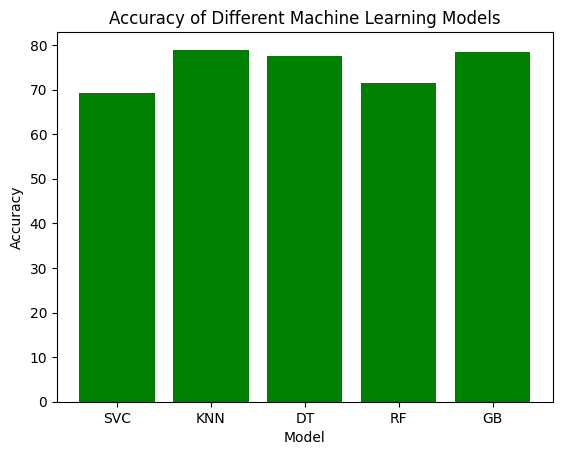

In [753]:
data = pd.DataFrame({'Models':['SVC','KNN','DT','RF','GB'],
                    'ACC':[Accmodel1,
                          Accmodel2,
                          Accmodel3,
                          Accmodel4,
                          Accmodel5]})

# Create a bar plot of the accuracy of each model
plt.bar(data['Models'], data['ACC'],color='g')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Machine Learning Models")
plt.show()

In [754]:
from sklearn.svm import SVC
SVMmodel1 = SVC(kernel='rbf') #RBF(Radial Basis Function) Kernel
SVMmodel2 = SVC(gamma=0.01)
SVMmodel3 = SVC(kernel='sigmoid') #Sigmoid Kernel
SVMmodel4 = SVC(gamma=0.001,C=5)
SVMmodel5 = SVC(kernel='poly') #Polynomial Kernel


SVMmodel1.fit(Xtrain,ytrain)
SVMmodel2.fit(Xtrain,ytrain)
SVMmodel3.fit(Xtrain,ytrain)
SVMmodel4.fit(Xtrain,ytrain)
SVMmodel5.fit(Xtrain,ytrain)


y_predModel2 = SVMmodel1.predict(Xtest)
y_predModel3 = SVMmodel2.predict(Xtest)
y_predModel4 = SVMmodel3.predict(Xtest)
y_predModel5 = SVMmodel4.predict(Xtest)
y_predModel6 = SVMmodel5.predict(Xtest)

print("Accuracy of the Model 1: {0}%".format(accuracy_score(ytest, y_predModel2)*100))
print("Accuracy of the Model 2: {0}%".format(accuracy_score(ytest, y_predModel3)*100))
print("Accuracy of the Model 3: {0}%".format(accuracy_score(ytest, y_predModel4)*100))
print("Accuracy of the Model 4: {0}%".format(accuracy_score(ytest, y_predModel5)*100))
print("Accuracy of the Model 5: {0}%".format(accuracy_score(ytest, y_predModel6)*100))

Accuracy of the Model 1: 69.2982456140351%
Accuracy of the Model 2: 72.36842105263158%
Accuracy of the Model 3: 51.31578947368421%
Accuracy of the Model 4: 70.6140350877193%
Accuracy of the Model 5: 68.85964912280701%


In [755]:

import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl', 'rb'))

In [756]:
input_data = [[22,1,1,8,1,3]]

prediction = knn.predict(input_data)
print(prediction)

if (prediction[0] == 0):
  print('not placed')
else:
  print('placed')

[1]
placed
